In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pysal as ps
import libpysal.api as lp
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import splot

from libpysal import examples

from importlib import reload

## Example Data

First, we will load the Guerry.shp data from `examples` in `libpysal`.

In [2]:
f = lp.open(lp.get_path("sids2.dbf"))

varnames = ['SIDR74',  'SIDR79',  'NWR74',  'NWR79']
vars = [np.array(f.by_col[var]) for var in varnames]

w = lp.open(lp.get_path("sids2.gal")).read()

from esda.moran import Moran_BV_matrix
moran_matrix = Moran_BV_matrix(vars,  w,  varnames = varnames)

In [3]:
len(moran_matrix)
moran_matrix[(0,  1)].varnames

{'x': 'SIDR74', 'y': 'SIDR79'}

In [4]:
from splot._viz_esda_mpl import moran_facette
from importlib import reload

reload(splot._viz_esda_mpl)

<module 'splot._viz_esda_mpl' from '/Users/steffie/code/splot/splot/_viz_esda_mpl.py'>

In [5]:
moran_matrix.keys()

dict_keys([(0, 1), (1, 0), (0, 2), (2, 0), (0, 3), (3, 0), (1, 2), (2, 1), (1, 3), (3, 1), (2, 3), (3, 2)])

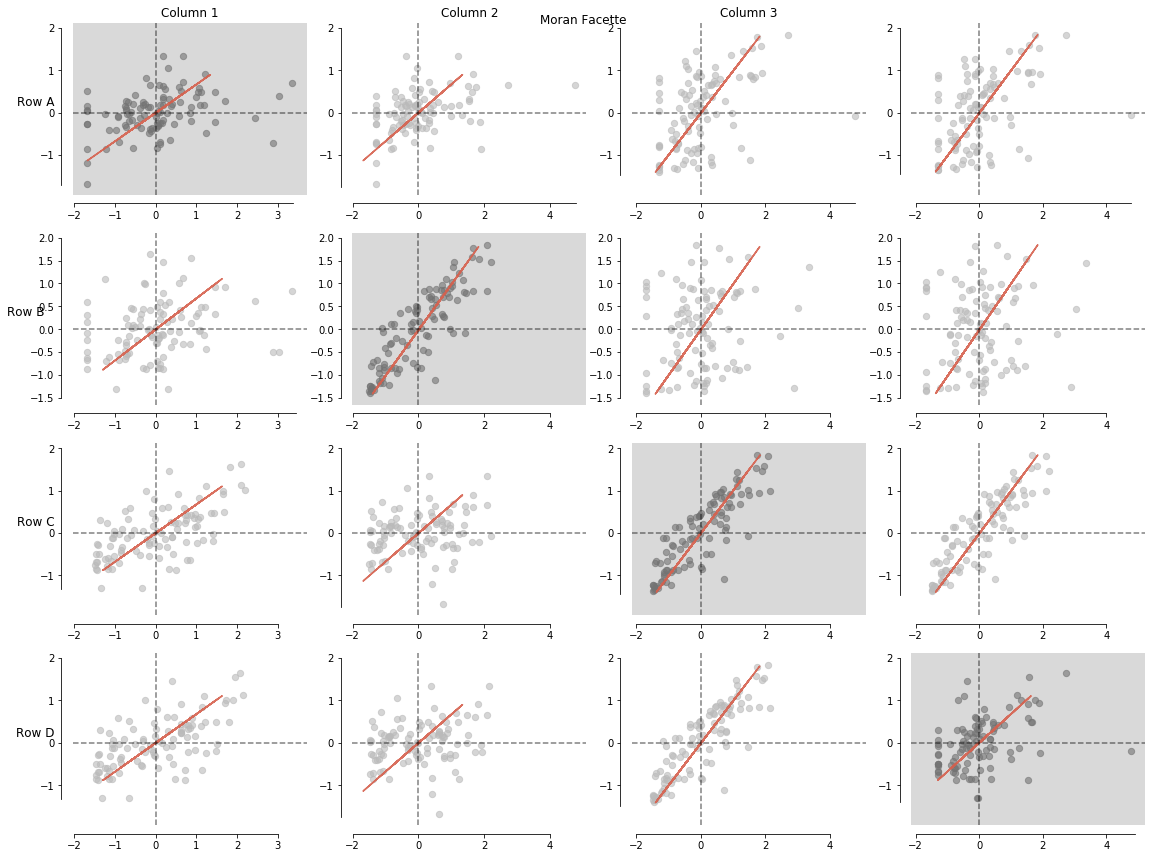

In [6]:
fig, axarr = moran_facette(moran_matrix)
plt.show()

In [42]:
def moran_facette(moran_matrix, figsize=(16,12),
                  scatter_bv_kwds=None, fitline_bv_kwds=None,
                  scatter_glob_kwds=dict(color='#737373'), fitline_glob_kwds=None):
    nrows = int(np.sqrt(len(moran_matrix))) + 1
    ncols = nrows
    
    fig, axarr = plt.subplots(nrows, ncols, figsize=figsize,
                              sharey='row', sharex='col')
    fig.suptitle('Moran Facette')
    
    for row in range(nrows):
        for col in range(ncols):
            if not ncols == 0 or not nrows == 3:
                _clear_spines(axarr[row, col])
            if row == col:
                global_m = Moran(moran_matrix[row, (row+1) % 4].zy,
                                 moran_matrix[row, (row+1) % 4].w)
                _moran_global_scatterplot(global_m, ax= axarr[row,col],
                                  scatter_kwds=scatter_glob_kwds,
                                  fitline_kwds=fitline_glob_kwds)
                axarr[row, col].set_facecolor('#d9d9d9')
            else:
                _moran_bv_scatterplot(moran_matrix[row,col],
                                  ax= axarr[row,col], 
                                  scatter_kwds=scatter_bv_kwds,
                                  fitline_kwds=fitline_bv_kwds)
                axarr[row, col].spines['left'].set_visible(False)
    
    plt.setp(axarr, xlabel='', ylabel='', title='',) #xticks=[], yticks=[])
    
    cols = ['Column {}'.format(col) for col in range(1, 4)]
    rows = ['Row {}'.format(row) for row in ['A', 'B', 'C', 'D']]

    for ax, col in zip(axarr[0], cols):
        ax.set_title(col)

    for ax, row in zip(axarr[:,0], rows):
        ax.set_ylabel(row, rotation=0, size='large')
    
    # plt.tight_layout()
    return fig, axarr


def _clear_spines(ax):
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

NameError: name 'x' is not defined

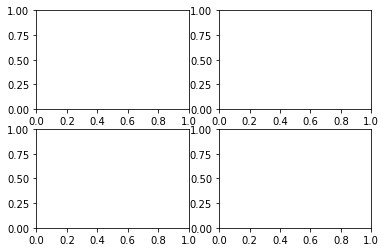

In [7]:

# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

In [ ]:
import geopandas
from shapely.geometry import Polygon
import random
import matplotlib

matplotlib.cm.ScalarMappable(cmap='GnBu')


cols = matplotlib.colors.to_rgba("GnBu")

In [ ]:
cols

In [ ]:
cols[:, -1] = [0.2, 0.2, 0.2, 0.9]

random.seed(1)
s = geopandas.GeoSeries([Polygon([(random.random(), random.random()) for i in range(3)]) for _ in range(4)])

s.plot(color=cols)

In [ ]:
link_to_data = examples.get_path('Guerry.shp')
gdf = gpd.read_file(link_to_data)

In [ ]:
y = gdf['Donatns'].values
x = gdf['Suicids'].values
w = lp.Queen.from_dataframe(gdf)
w.transform = 'r'

In [ ]:
def value_by_alpha(x, y, gdf, c='GnBu'):
    rgb = matplotlib.colors.to_rgba_array(c)
    alpha_channel = x/y.max()
    rgba = np.vstack((rgb, np.asarray(alpha_channel).reshape(-1,1)))
    fig, ax = geodataframe.plot(x, color=rgba)
    return fig, ax

In [ ]:
value_by_alpha(x,y,gdf)

In [ ]:
rgb = matplotlib.colors.to_rgba_array(x)
alpha_channel = x/y.max()
rgba = np.vstack((rgb, np.asarray(alpha_channel).reshape(-1,1)))

In [ ]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(10)
y = np.arange(10)

alphas = np.linspace(0.5, 1, 10)
rgba_colors = np.zeros((10,4))
# for red the first column needs to be one
rgba_colors[:,0] = 1.0
# the fourth column needs to be your alphas
rgba_colors[:, 3] = alphas

plt.scatter(x, y, color=rgba_colors)
plt.show()